### 표준라이버러리 버전확인

In [1]:
import sys
print('python 버젼 : ', sys.version)

import numpy as np
print('Numpy 버젼 : ', np.__version__)

import pandas as pd
print('Pandas 버젼 : ', pd.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib 버젼 : ', mpl.__version__)

import scipy as sp
print('Scipy 버젼 : ', sp.__version__)

import sklearn
print('Scikit-learn 버젼 : ', sklearn.__version__)

python 버젼 :  3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Numpy 버젼 :  1.16.2
Pandas 버젼 :  0.24.2
Matplotlib 버젼 :  3.0.3
Scipy 버젼 :  1.2.1
Scikit-learn 버젼 :  0.20.3


### 1. 데이터 적재와 잔처리

In [3]:
from sklearn.datasets import load_iris
# load_iris() 데이터를 불러오면 Bunch 클래스 객체로 읽어온다. - 파이썬 dict와 유사
# 파이썬의 dict(딕셔너리) - key : value
iris_dataset = load_iris()

In [4]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris_dataset['DESCR'][:193] + '\n ...') # 줄인다.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
 ...


In [ ]:
# Number of Instances: 150 (50 in each of three classes)
# -> 50개 씩 다른 샘플을 가지고 있다.

In [6]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_dataset['feature_names'] # 정제가 잘 되어있는 data -> (cm)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# 실제 데이터를 가지고 있는 target, data 필드(numpy 배열 형태)
type(iris_dataset['data'])

numpy.ndarray

In [9]:
# 배열의 차원
iris_dataset['data'].shape

(150, 4)

In [10]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
iris_dataset['target'].shape # 어떤 품종인지 적혀있음.

(150,)

In [12]:
iris_dataset['target'] # ['setosa', 'versicolor', 'virginica'] 각 0, 1, 2
# train data와 test data를 동일 data로 진행시키면 좋지 못한 모델이다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 훈련데이터(train data)와 테스트데이터(test data)로 분리
- train_test_split() 함수를 이용
- 일반적으로는 train 75%(data, target), 나머지 25% test(data, target)

In [13]:
from sklearn.model_selection import train_test_split
# sklearn에서 일반적으로 데이터는 대문자 X, 레이블(target)은 소문자 y로 표시
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'],
                                                   random_state = 0) # 75, 25 나누면 제대로 안 섞여서
                                                                # 섞는다는 의미 , 숫자는 중요X 
                                                # ,test_size = 0.2)  # train data와 test data 8:2 


In [14]:
print('X_train 크기 : ', X_train.shape)

X_train 크기 :  (112, 4)


In [15]:
print('y_train 크기 : ', y_train.shape)

y_train 크기 :  (112,)


In [16]:
print('X_test 크기 : ', X_test.shape)

X_test 크기 :  (38, 4)


In [17]:
print('y_test 크기 : ', y_test.shape)

y_test 크기 :  (38,)


### 2. 데이터의 탐색과 시각화

In [19]:
# x_train 데이터를 사용해서 시각화 하는 작업 => 데이터프레임으로 변환
# iris_dataset['feature_names']
iris_df = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


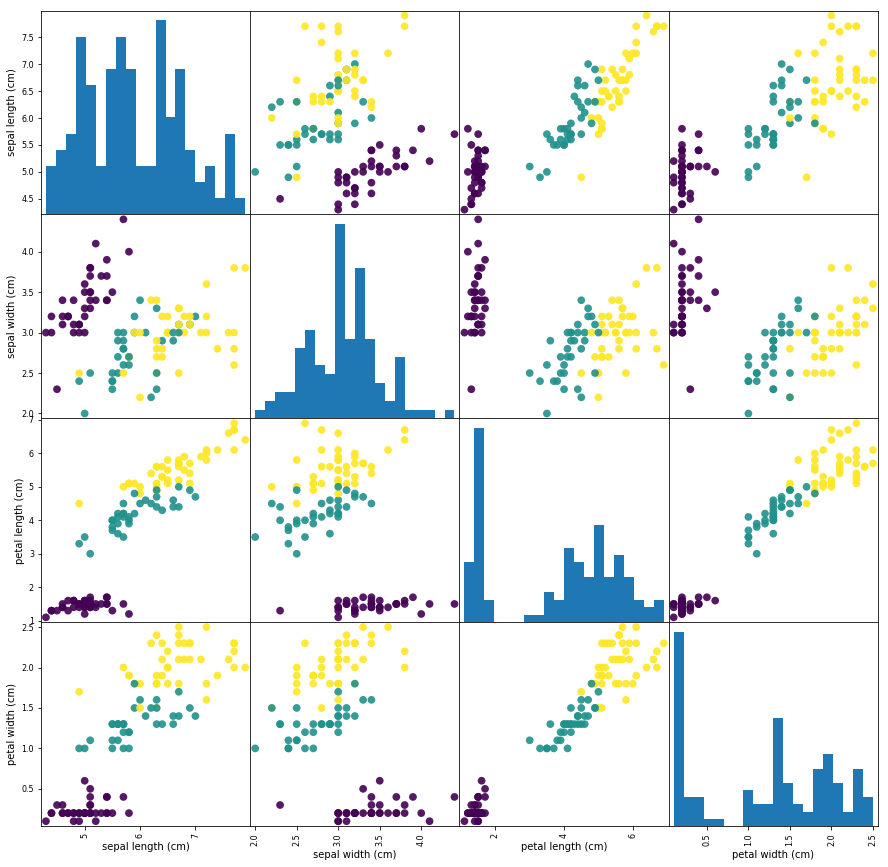

In [20]:
# 산점도 행렬
pd.plotting.scatter_matrix(iris_df, c=y_train,  # c=y_train -> label을 가지고 있음
                           figsize= (15, 15), marker = 'o', hist_kwds = {'bins':20},
                           s = 60, alpha = 0.9) # s - markersize 
plt.show()

### 3. 모델링 - k-NN 최근접 이웃 알고리즘을 이용한 머신러닝 학습

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [22]:
# 학습과 모델링을 생성하는 작업
knn.fit(X_train, y_train) # 학습이 된것을 knn에 저장

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### 예측하는 작업

In [24]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # 2차원 배열 형태로 담아야 함.
X_new.shape

(1, 4)

In [26]:
pre = knn.predict(X_new)
print('예측 : ', pre)
print('예측한 타깃의 이름 : ', iris_dataset['target_names'][pre])

예측 :  [0]
예측한 타깃의 이름 :  ['setosa']


### 모델 평가하는 작업
- 데스트 데이터를 이용한 예측하는 작업

In [27]:
y_pred = knn.predict(X_test)
print('테스트 데이터의 예측값 : \n', y_pred)

테스트 데이터의 예측값 : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [28]:
# 일반적으로 한것
print('테스트 세트의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test))) # 차이검증

테스트 세트의 정확도 : 0.97


In [29]:
# score() 사용 한것.
print('테스트 세트의 정확도 : {:.2f}'.format(knn.score(X_test, y_test)))

테스트 세트의 정확도 : 0.97


### 요약

In [30]:
# 전체적
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'],
                                                   random_state = 0) # 나누기

knn = KNeighborsClassifier(n_neighbors = 1) # 모델링 생성
knn.fit(X_train, y_train)                   # 학습과 모델링을 생성하는 작업
print('테스트 세트의 정확도 : {:.2f}'.format(knn.score(X_test, y_test))) # 모델링 평가

테스트 세트의 정확도 : 0.97
